# Homework 6: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from the ECCO Version 5 State Estimate.

#### Import Modules:
Begin by importing the modules to read in data from NetCDF files, conduct calculations, and make plots.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

Define a path to your data folder where you will store data for this exercise.

In [2]:
data_folder = 'F:\data\ECCO\Version5\Alpha\\'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

\begin{equation}
    \frac{D \theta}{D t} = \kappa \frac{\partial^2 \theta}{\partial t^2} + \frac{J_H}{C_p \rho_\omega}
\end{equation}

$$
\begin{array}{l}
\text{Overview:} \\
\frac{D\theta }{Dt}  \text{ represents the Lagrangian derivative, indicating the derivative at one location,} \\ 
\text{plus some change due to the flow of water.}\\
\\
\theta \text{ is the potential temperature, a measurement relating heat and pressure.}\\
t \text{ is time.}\\
\text{-----------------------------------}\\
\kappa \frac{\partial ^{2} \theta }{\partial t^{2}}  \text{ represents diffusion (of heat) through the mass.}\\
\kappa  \text{ is the thermal conductivity.}\\
\text{-----------------------------------}\\
\frac{J_{H}}{C_{p} \rho _{\omega }}  \text{ represents the changes due to the transport of water.}\\
J_{H}  \text{ represents sources of change in water.}\\
C_{p} \text{ is the heat capacity of water.}\\
\rho _{\omega }  \text{ is the density of water.}
\end{array}
$$


## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

\begin{array}{l}
\text{we use } \theta \text{, the potential temperature, because it gives us more simplified computations as compared }\\
\text{to using the specific temperature t which doesn't account for the pressure changes in the water}
\end{array}

## Part 3: Download Data
To compare the relative magnitudes of advection and diffusion in the ocean, we will use output from the ECCO Version 5 State Estimate.

Download the following files from the [ECCO Drive]():
- Version5/Alpha/nctiles_monthly/ADVx_TH/ADVx_TH_2010.nc
- Version5/Alpha/nctiles_monthly/ADVy_TH/ADVy_TH_2010.nc
- Version5/Alpha/nctiles_monthly/DFxE_TH/DFxE_TH_2010.nc
- Version5/Alpha/nctiles_monthly/DFyE_TH/DFyE_TH_2010.nc
- Version5/Alpha/nctiles_grid/GRID.0002.nc

The final file in the list describes the geometry of the second tile of the ECCO model grid. The model is divided up into 13 tiles, each corresponding to a different part of the ocean.

Be sure to keep these files organized in your `data_folder`.

## Part 4: Read in the data
The files downloaded above refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields is given by $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.


In addition to the 4 fields above, also read in the fields 'XC' and 'YC' from the GRID.0002.nc file. These components correspond to longitude and latitude in the second tile of the ECCO Grid.

In [3]:
# read in your data here
nctiles_monthly = data_folder + 'nctiles_monthly\\'
nctiles_grid = data_folder + 'nctiles_grid\\'
adv_x_ds = xr.open_dataset(nctiles_monthly + 'ADVx_TH\ADVx_TH_2010.nc')
adv_y_ds = xr.open_dataset(nctiles_monthly + 'ADVy_TH\ADVy_TH_2010.nc')
dfe_x_ds = xr.open_dataset(nctiles_monthly + 'DFxE_TH\DFxE_TH_2010.nc')
dfe_y_ds = xr.open_dataset(nctiles_monthly + 'DFyE_TH\DFyE_TH_2010.nc')
tiles_ds = xr.open_dataset(nctiles_grid    + 'GRID.0002.nc')

Subset the variables to the first timestep ($time=0$), on the first depth level ($k=0$), on the second tile ($tile=1$). In addition, if you have not done so already, be sure to convert your data to a `numpy` array (important for subsequent calculations).

In [4]:
# subset your data here
adv_x = np.array(adv_x_ds['ADVx_TH'].isel(time=0, k=0, tile=1))
adv_y = np.array(adv_y_ds['ADVy_TH'].isel(time=0, k=0, tile=1))
dfe_x = np.array(dfe_x_ds['DFxE_TH'].isel(time=0, k=0, tile=1))
dfe_y = np.array(dfe_y_ds['DFyE_TH'].isel(time=0, k=0, tile=1))

xc = np.array(tiles_ds['XC'])
yc = np.array(tiles_ds['YC'])

adv_x_ds.close()
adv_y_ds.close()
dfe_x_ds.close()
dfe_y_ds.close()
tiles_ds.close()

## Part 5: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

In [5]:
max_adv = np.max(np.abs([adv_x, adv_y]))/3
max_dfe = np.max(np.abs([dfe_x, dfe_y]))/9

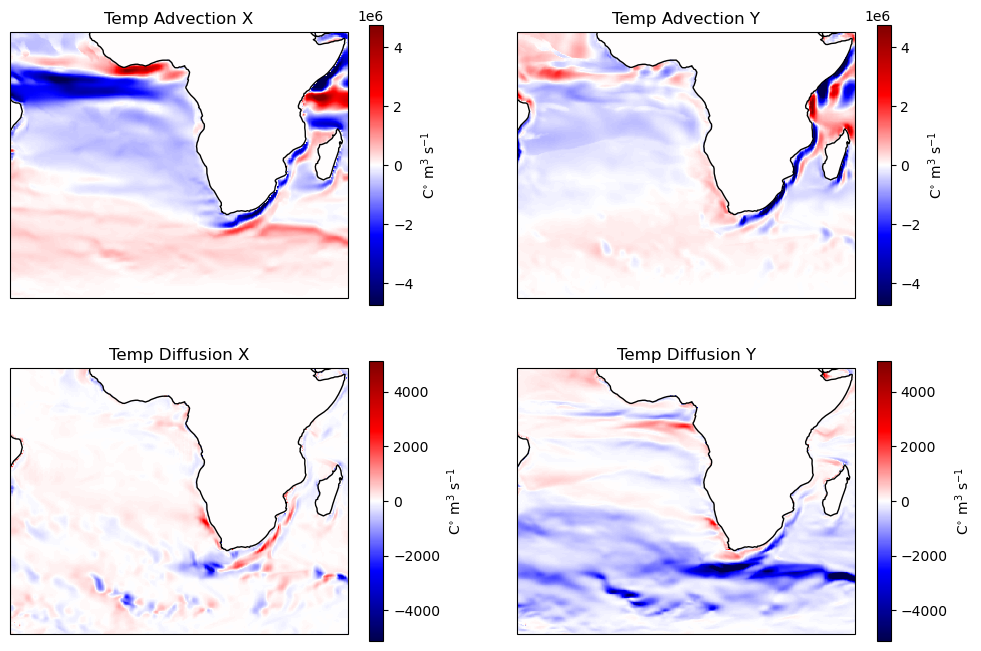

In [6]:
unit_label = 'C$^{\circ}$ m$^3$ s$^{-1}$'
cmap = "seismic"

fig, axs = plt.subplots(2, 2, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

axs[0,0].set_title('Temp Advection X')
axs[0,0].add_feature(cfeature.COASTLINE)
fig1 = axs[0,0].pcolormesh(xc, yc, adv_x, vmin=-max_adv, vmax=max_adv, cmap=cmap)
fig.colorbar(fig1, ax=axs[0,0], label=unit_label)

axs[0,1].set_title('Temp Advection Y')
axs[0,1].add_feature(cfeature.COASTLINE)
fig2 = axs[0,1].pcolormesh(xc, yc, adv_y, vmin=-max_adv, vmax=max_adv, cmap=cmap)
fig.colorbar(fig2, ax=axs[0,1], label=unit_label)

axs[1,0].set_title('Temp Diffusion X')
axs[1,0].add_feature(cfeature.COASTLINE)
fig3 = axs[1,0].pcolormesh(xc, yc, dfe_x, vmin=-max_dfe, vmax=max_dfe, cmap=cmap)
fig.colorbar(fig3, ax=axs[1,0], label=unit_label)

axs[1,1].set_title('Temp Diffusion Y')
axs[1,1].add_feature(cfeature.COASTLINE)
fig4 = axs[1,1].pcolormesh(xc, yc, dfe_y, vmin=-max_dfe, vmax=max_dfe, cmap=cmap)
fig.colorbar(fig4, ax=axs[1,1], label=unit_label)

plt.show()

## Part 6: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [7]:
# conduct your calculation here
mag_adv = np.sqrt(adv_x**2 + adv_y**2)
mag_dfe = np.sqrt(dfe_x**2 + dfe_y**2)  

Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

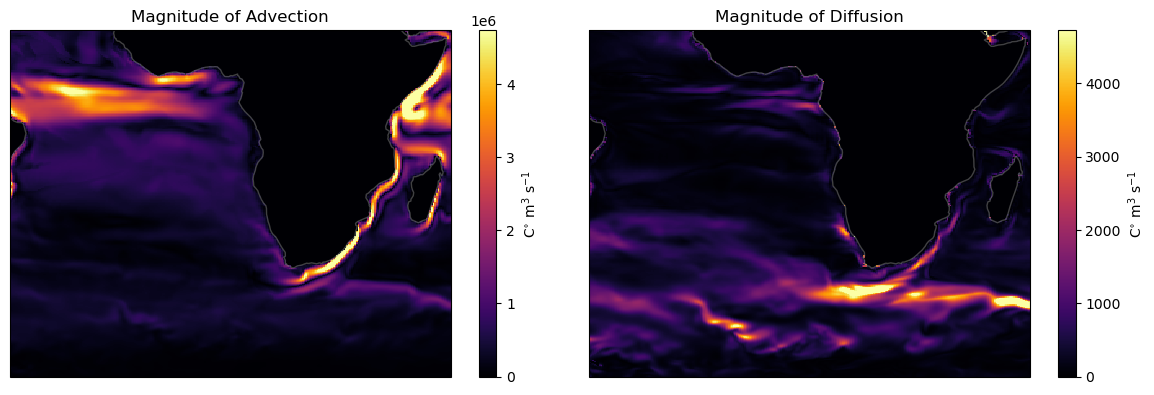

In [8]:
# make your plot here
seq_cmap = "inferno"
max_mag_adv = np.max(mag_adv)/3
max_mag_dfe = np.max(mag_dfe)/10

fig, axs = plt.subplots(1, 2, figsize=(12, 4), subplot_kw={'projection': ccrs.PlateCarree()})

axs[0].set_title('Magnitude of Advection')
axs[0].add_feature(cfeature.COASTLINE, edgecolor='grey', alpha=0.5)
fig5 = axs[0].pcolormesh(xc, yc, mag_adv, vmax=max_mag_adv, cmap=seq_cmap)
fig.colorbar(fig5, ax=axs[0], label=unit_label)

axs[1].set_title('Magnitude of Diffusion')
axs[1].add_feature(cfeature.COASTLINE, edgecolor='grey', alpha=0.5)
fig6 = axs[1].pcolormesh(xc, yc, mag_dfe, vmax=max_mag_dfe, cmap=seq_cmap)
fig.colorbar(fig6, ax=axs[1], label=unit_label)

plt.tight_layout()
plt.show()

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [10]:
mag_adv_zeros_removed = mag_adv[mag_adv > 0]
mag_dfe_zeros_removed = mag_dfe[mag_dfe > 0]
mag_adv_average = np.mean(mag_adv_zeros_removed)
mag_dfe_average = np.mean(mag_dfe_zeros_removed)
ratio = mag_adv_average/mag_dfe_average

print(ratio)

1159.545


## Part 7: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

The analysis shows that the effect of advection is 1159x larger than the effect of diffusion when it comes to the oceans. Because of this, we can remove the diffusion term and still maintain a high level of accuracy when it comes to predicting ocean temperature transport.

The term we remove would be:
$$
\kappa \frac{\partial ^{2} \theta }{\partial t^{2}}
$$

Leaving us with the equation:
\begin{equation}
    \frac{D \theta}{D t} =  \frac{J_H}{C_p \rho_\omega}
\end{equation}